# **時系列分析の手法を学ぼう**

**１．課題把握とゴールの設定**

課題

・ある空港の旅客数の過去の推移から、向こう3年の旅客数の推移を予測したい。

・どれくらい予測が的中しそうかも知りたい。

ゴール

・向こう３年の旅客数の推測をグラフで可視化する。

・どの程度、予測が的中しそうか定量的に明示する。


２．必要なライブラリのインポート

In [1]:
#データを使用するためにpandasをインポート
#データの可視化のためにseabornをインポート
import pandas as pd
import seaborn as sns

**３，データの準備**

prophedが提供しているサンプルデータ「example_air_passengers,csv」を利用し、時系列分析を行う。

In [2]:
#pandasのread_csv関数でデータを取り込む
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_air_passengers.csv')
df

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


<Axes: xlabel='ds', ylabel='y'>

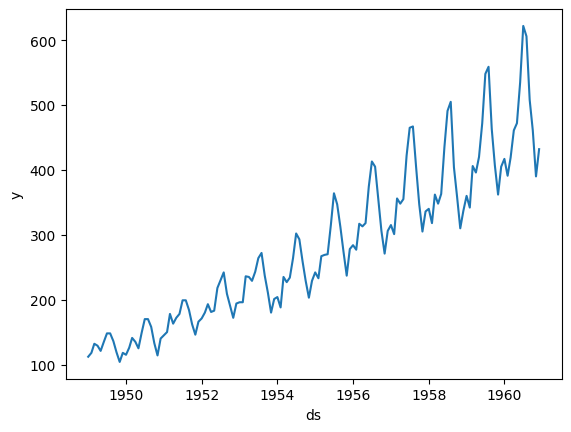

In [3]:
#seabornのlineplot関数によって折れ線グラフで描画してみる。
#xパラメータにto_datetime関数で変換した日付エータを指定する。
#prophetの仕様において、時系列データの列名はds、y列の値は数値データとするルールがあるため注意
time = pd.to_datetime(df['ds'])
sns.lineplot(x=time, y=df['y'])

In [4]:
#データの欠損値の有無を確認する
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ds      144 non-null    object
 1   y       144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


ds,yともに144の値がnon-nullであることが分かる。

rangeindexが144なので、欠損値はない。

前処理として欠損の対応は不要であることが分かった。

**４．予測モデルの学習**

In [5]:
#Prophetクラスをインポートし、model変数に代入しインスタンス化
from prophet import Prophet
model = Prophet()

In [6]:
#dfを引数に指定してfitメソッドを実行する(この処理が学習に相当)
model.fit(df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxil4n5mp/ulyyg7m9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxil4n5mp/ykp6pfys.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62020', 'data', 'file=/tmp/tmpxil4n5mp/ulyyg7m9.json', 'init=/tmp/tmpxil4n5mp/ykp6pfys.json', 'output', 'file=/tmp/tmpxil4n5mp/prophet_model8udfqifq/prophet_model-20240401101203.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:12:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:12:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


**５．予測**

In [7]:
#予測の準備のため、予測したい未来に知事を含むDataFrameを作成する
#予測期間を指定してmake_future_dataframeメソッドをfutureに代入して実行する
#periodsパラメータに予測危難として追加する行数（今回は３年=36か月）を指定
#freqパラメータに追加する日時データの間隔（今回は1か月の月初め)を指定
future = model.make_future_dataframe(periods=36, freq='MS')
future

,ds
0,1949-01-01
1,1949-02-01
2,1949-03-01
3,1949-04-01
4,1949-05-01
...,...
175,1963-08-01
176,1963-09-01
177,1963-10-01
178,1963-11-01


In [8]:
future.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      180 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.5 KB


１２ヶ月×１５年＝１８０か月のDataFrameを生成できた。

In [9]:
#DataFrameを引数に指定し、predictメソッドで予測を行う。
forecast = model.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1949-01-01,107.406338,56.422223,112.770469,107.406338,107.406338,-21.387455,-21.387455,-21.387455,-21.387455,-21.387455,-21.387455,0.0,0.0,0.0,86.018883
1,1949-02-01,109.550561,52.948230,109.137970,109.550561,109.550561,-30.055335,-30.055335,-30.055335,-30.055335,-30.055335,-30.055335,0.0,0.0,0.0,79.495226
2,1949-03-01,111.487279,79.738396,139.068296,111.487279,111.487279,-0.461698,-0.461698,-0.461698,-0.461698,-0.461698,-0.461698,0.0,0.0,0.0,111.025581
3,1949-04-01,113.631502,78.107983,135.764514,113.631502,113.631502,-4.912485,-4.912485,-4.912485,-4.912485,-4.912485,-4.912485,0.0,0.0,0.0,108.719017
4,1949-05-01,115.706556,83.478737,142.062731,115.706556,115.706556,-3.611275,-3.611275,-3.611275,-3.611275,-3.611275,-3.611275,0.0,0.0,0.0,112.095281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,1963-08-01,583.129515,623.785031,678.592190,580.238951,585.808342,67.604288,67.604288,67.604288,67.604288,67.604288,67.604288,0.0,0.0,0.0,650.733803
176,1963-09-01,586.261164,576.406249,633.216875,583.227417,589.107698,17.222424,17.222424,17.222424,17.222424,17.222424,17.222424,0.0,0.0,0.0,603.483588
177,1963-10-01,589.291792,537.722058,595.455448,586.109847,592.274867,-22.032179,-22.032179,-22.032179,-22.032179,-22.032179,-22.032179,0.0,0.0,0.0,567.259613
178,1963-11-01,592.423441,506.149123,566.728161,589.115422,595.560911,-56.983658,-56.983658,-56.983658,-56.983658,-56.983658,-56.983658,0.0,0.0,0.0,535.439784


In [10]:
#ゴールに関する項目を抽出する。
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,1949-01-01,86.018883,56.422223,112.770469
1,1949-02-01,79.495226,52.948230,109.137970
2,1949-03-01,111.025581,79.738396,139.068296
3,1949-04-01,108.719017,78.107983,135.764514
4,1949-05-01,112.095281,83.478737,142.062731
...,...,...,...,...
175,1963-08-01,650.733803,623.785031,678.592190
176,1963-09-01,603.483588,576.406249,633.216875
177,1963-10-01,567.259613,537.722058,595.455448
178,1963-11-01,535.439784,506.149123,566.728161


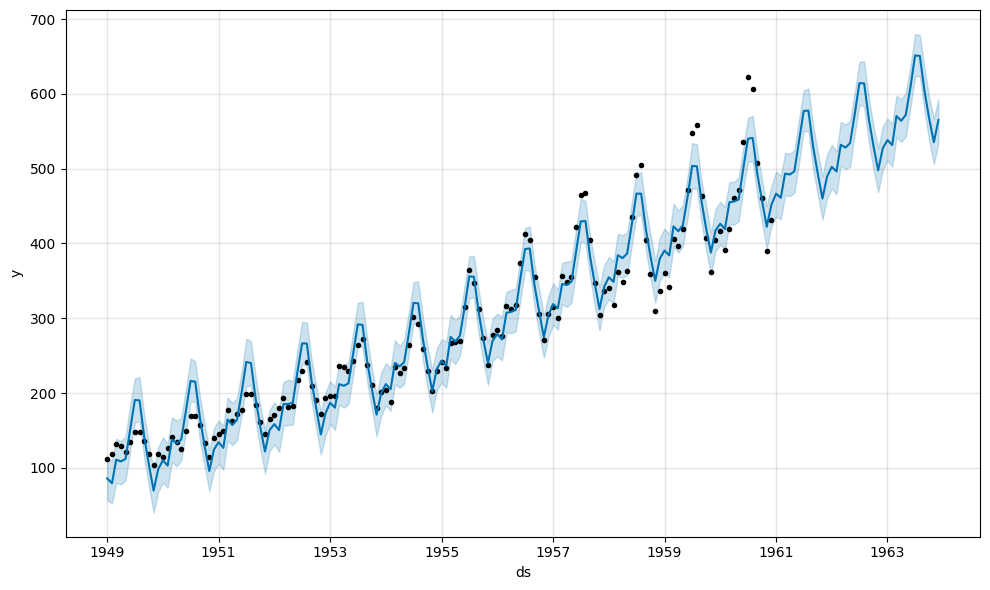

In [11]:
#上記データフレームの日付、旅客数の予測値、不確実性区間をグラフで可視化する。
fig_forecast = model.plot(forecast)

**６．予測の評価**

In [12]:
#cutoffs変数を作り、1954/12/1, 1955/12/1, 1956/12/1, 1957/12/1(horizonを3年)としたデータを作成する。
cutoffs = pd.to_datetime(['1954-12-01', '1955-12-01', '1956-12-01', '1957-12-01'])

In [13]:
#テストパターンを作成するcross_validation関数をインポート
from prophet.diagnostics import cross_validation

In [14]:
#引数にhorizonパラメータ（うるう年考慮の365日×３年+1 = 1096日)、cutoffsパラメータを指定しcross_validation関数を実行
df_cv = cross_validation(model, horizon = '1096 days', cutoffs=cutoffs)

  0%|          | 0/4 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpxil4n5mp/01lla6hi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxil4n5mp/f10q9ixw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86247', 'data', 'file=/tmp/tmpxil4n5mp/01lla6hi.json', 'init=/tmp/tmpxil4n5mp/f10q9ixw.json', 'output', 'file=/tmp/tmpxil4n5mp/prophet_modelrpzu2o9e/prophet_model-20240401101204.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
10:12:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:12:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxil4n5mp/3yp4a7un.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxil4n5mp/6noo56q1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local

In [15]:
#df_cvデータの確認
df_cv

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1955-01-01,237.821995,226.325792,248.979857,242,1954-12-01
1,1955-02-01,241.792078,230.894234,252.886321,233,1954-12-01
2,1955-03-01,267.141230,256.556501,277.549491,267,1954-12-01
3,1955-04-01,257.744480,246.498269,270.140444,269,1954-12-01
4,1955-05-01,261.961916,250.806054,272.734179,270,1954-12-01
...,...,...,...,...,...,...
139,1960-08-01,548.443272,527.601362,567.893691,606,1957-12-01
140,1960-09-01,511.578231,491.650969,530.772677,508,1957-12-01
141,1960-10-01,480.747994,459.754825,501.032441,461,1957-12-01
142,1960-11-01,455.417988,435.106147,476.172830,390,1957-12-01


In [16]:
#評価指標を算出するperformance_metrics関数をインポート
from prophet.diagnostics import performance_metrics

In [17]:
#df_p変数に引数df_cvを指定しperformance_metrics関数を実行
#monthlyパラメータにTrueを指定しhorizon列を月単位で表示できる。
df_p = performance_metrics(df_cv, monthly=True)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,4,662.883807,25.746530,18.530659,0.057799,0.039788,0.055068,0.642857
1,5,577.741878,24.036262,16.903350,0.051203,0.030947,0.049111,0.714286
2,6,676.263707,26.005071,19.591839,0.056243,0.030947,0.056366,0.607143
3,7,1338.378492,36.583856,29.852167,0.078469,0.091159,0.081789,0.392857
4,8,1849.989022,43.011499,38.904615,0.097044,0.107401,0.102882,0.178571


<Axes: xlabel='horizon', ylabel='mse'>

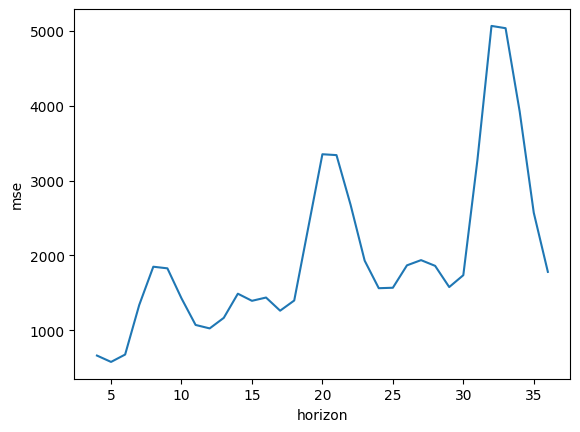

In [18]:
#seabornのlineplot関数を使用し実際の値と予測値の平均二乗誤差であるmseの推移を可視化
sns.lineplot(x='horizon', y='mse', data=df_p)

<Axes: xlabel='horizon', ylabel='coverage'>

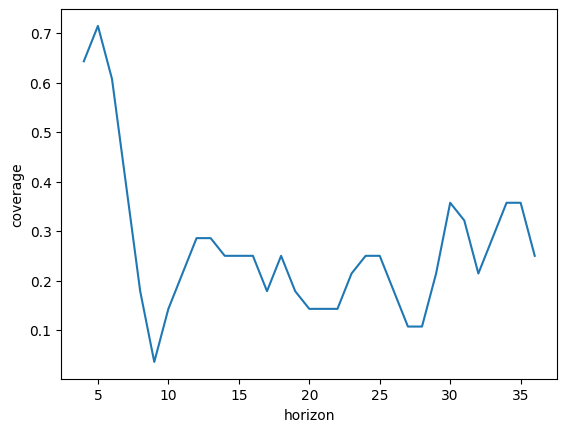

In [19]:
#不確実性区間に予測値が含まれている割合であるcoverageの推移を可視化
sns.lineplot(x='horizon', y='coverage', data=df_p)

**７．設定したゴールの回答**

ゴール

・向こう3年の旅客数の予測推移をグラフで可視化する。

・どの程度、予測が的中しそうか定量的に明示する。

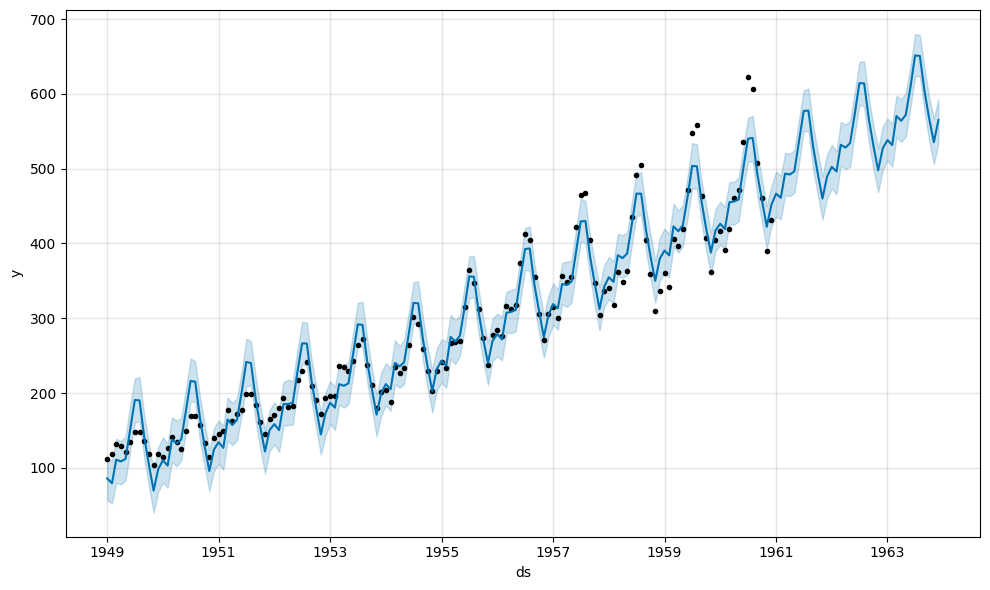

In [20]:
fig_forecast = model.plot(forecast)

<Axes: xlabel='horizon', ylabel='mse'>

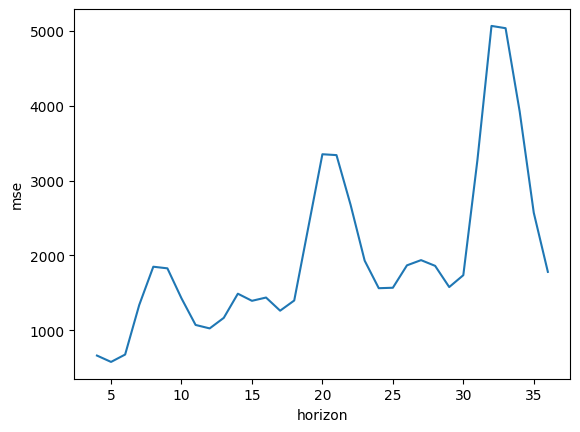

In [21]:
sns.lineplot(x='horizon', y='mse', data=df_p)

・グラフは上記。

・向こう３年の期間において、不確実性区間に実際の値が含まれる割合は10-30%と推測される。

・また、時間の経過に伴い予測値と実際の値の誤差が徐々に増加していくことも推測される。

# **予測モデルの改善**

１．改善方針の検討



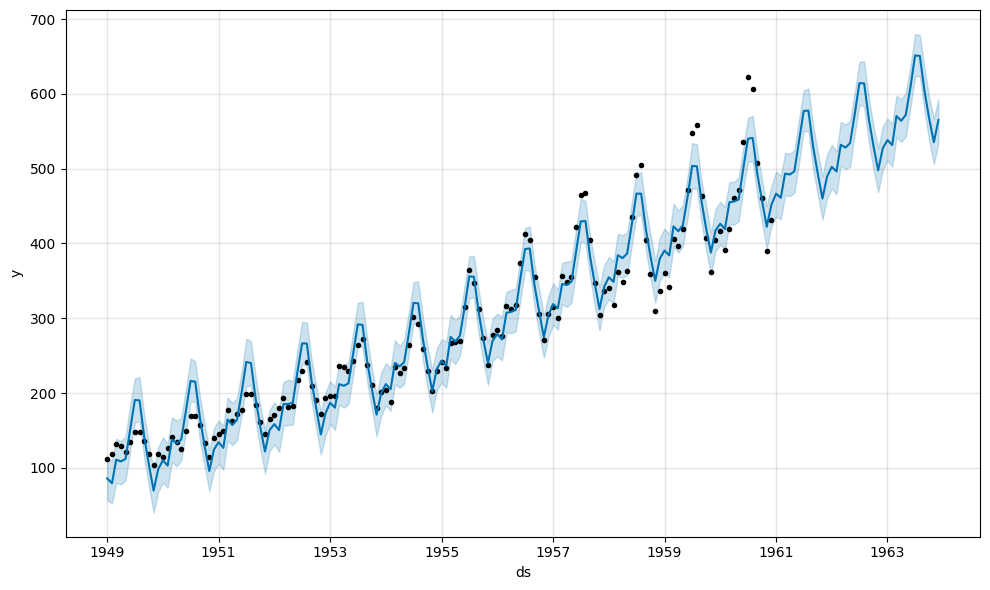

In [22]:
fig_forecast = model.plot(forecast)

黒点に注目。

旅客数は周期性を持つが、初期の変動は小さく、後期の変動は大きいように見える。

このような傾向の時系列データに対しては、周期性の変動g亜徐々に大きくなる形式の予測モデルを適応させる。

**２．予測モデルの学習**

In [23]:
from prophet import Prophet
model = Prophet(seasonality_mode='multiplicative')


In [24]:
#時系列データであるdfを因数に指定し、fitメソッドを実行
model.fit(df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxil4n5mp/h4qwm8cc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxil4n5mp/vhlfmo51.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28983', 'data', 'file=/tmp/tmpxil4n5mp/h4qwm8cc.json', 'init=/tmp/tmpxil4n5mp/vhlfmo51.json', 'output', 'file=/tmp/tmpxil4n5mp/prophet_modelp5hw6yzg/prophet_model-20240401110328.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:03:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:03:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


**３．予測**

In [25]:
future = model.make_future_dataframe(periods=36, freq='MS')

In [26]:
forecast = model.predict(future)

In [27]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,1949-01-01,103.222279,90.425944,115.924066
1,1949-02-01,99.776094,87.233669,113.015198
2,1949-03-01,114.336052,101.121153,127.661350
3,1949-04-01,115.805724,102.671462,128.219616
4,1949-05-01,118.780781,106.405293,133.140211
...,...,...,...,...
175,1963-08-01,763.659164,747.007242,781.525553
176,1963-09-01,645.607043,627.318051,661.770245
177,1963-10-01,561.686060,547.111515,578.307194
178,1963-11-01,490.587191,474.446808,507.133972


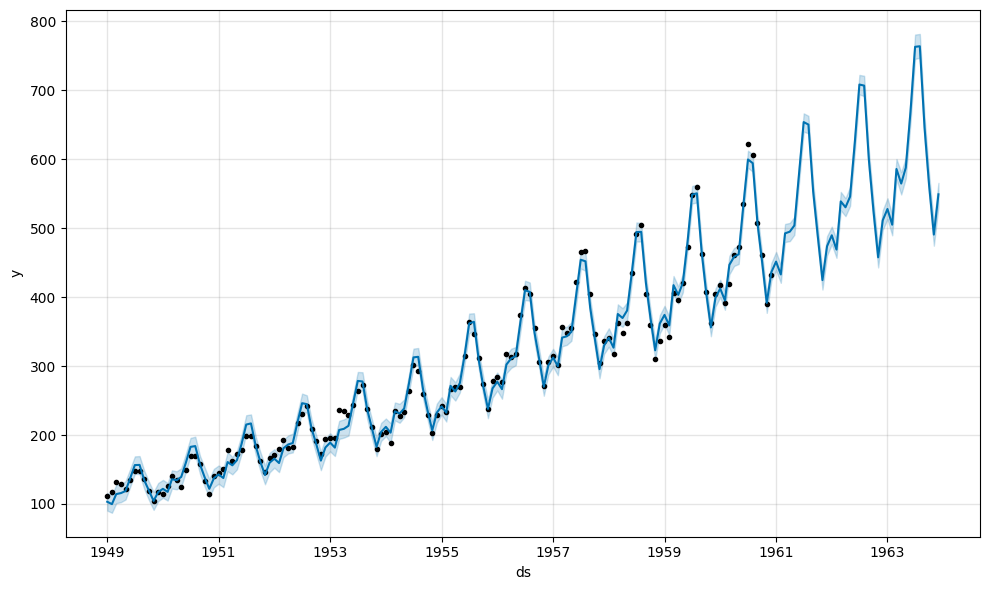

In [28]:
fig_forecast = model.plot(forecast)

４．予測の評価

In [29]:
cutoffs = pd.to_datetime(['1954-12-01', '1955-12-01', '1956-12-01', '1957-12-01'])

In [30]:
#cross_validation関数をインポートし、実行してテストパターンを作成
from prophet.diagnostics import cross_validation
df_cv = cross_validation(model, horizon = '1096 days', cutoffs=cutoffs)

  0%|          | 0/4 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpxil4n5mp/m9tbf47n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxil4n5mp/1_4ccw7v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50087', 'data', 'file=/tmp/tmpxil4n5mp/m9tbf47n.json', 'init=/tmp/tmpxil4n5mp/1_4ccw7v.json', 'output', 'file=/tmp/tmpxil4n5mp/prophet_model_6i_7evw/prophet_model-20240401110515.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
11:05:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:05:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxil4n5mp/6i3b1_4p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxil4n5mp/pwqk_0lr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local

In [31]:
#df_cvをもとに各評価指標を算出
#performance_metrics関数をインポートし、引数にdf_cvとmonthly=Trueを指定
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv, monthly=True)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,4,516.646720,22.729864,17.276762,0.053179,0.041884,0.051366,0.250000
1,5,562.945744,23.726478,17.760393,0.053184,0.038997,0.051283,0.285714
2,6,578.952325,24.061428,18.876014,0.054900,0.038997,0.054048,0.250000
3,7,630.668183,25.113108,20.616371,0.056222,0.053416,0.056658,0.285714
4,8,568.384348,23.840813,19.098780,0.050458,0.044292,0.051838,0.357143


[(0.0, 5000.0)]

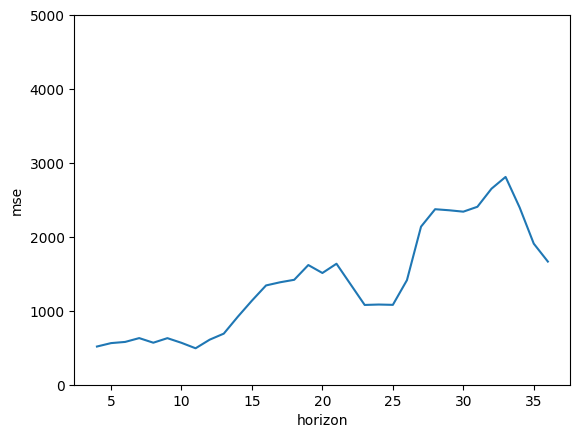

In [32]:
#改善前のmse推移と改善後のmse推移の比較のため、x軸とy軸を調整する。
sns.lineplot(x='horizon', y='mse', data=df_p).set(ylim=(0, 5000))

<Axes: xlabel='horizon', ylabel='coverage'>

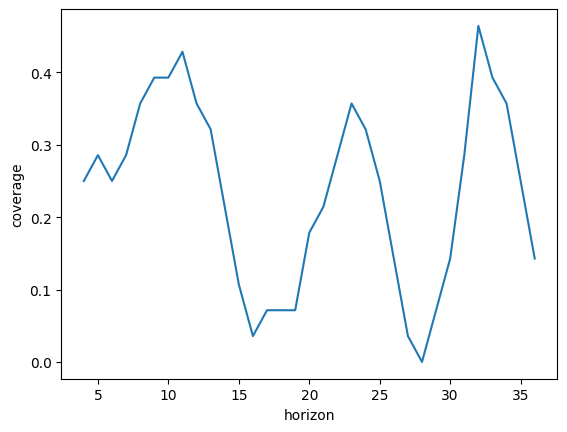

In [33]:
sns.lineplot(x='horizon', y='coverage', data=df_p)

設定したゴールの回答

・向こう3年の旅客数の予測推移をグラフで可視化する

・どの程度、予測が的中しそうか定量的に明示する

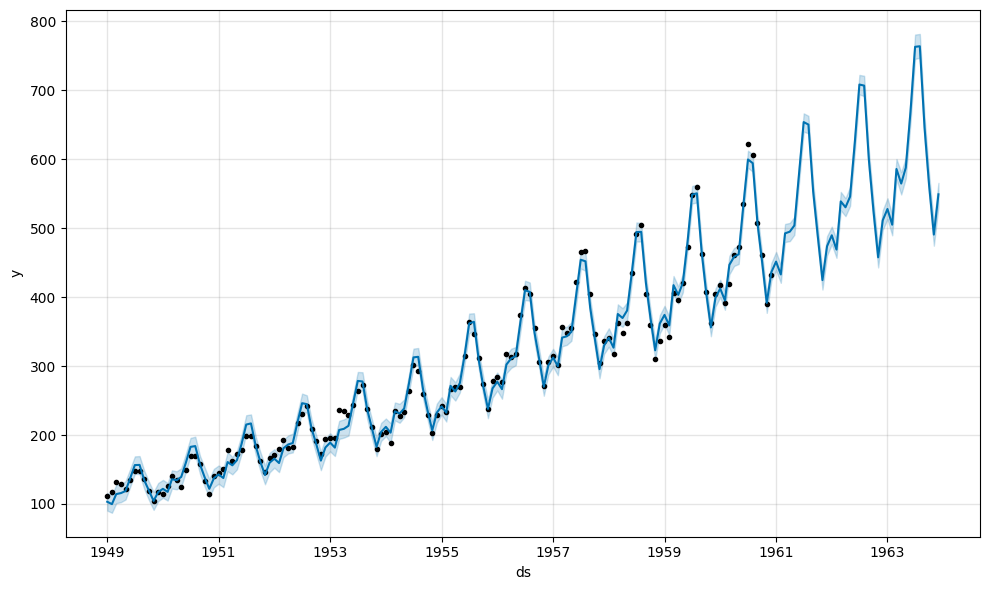

In [34]:
fig_forecast = model.plot(forecast)

向こう3年の期間において、不確実性区間に実際の値が含まれる割合は、0-40%程度と推定

また、時間の経過に伴い、以下のとおり予測値と実際の値の誤差が徐々に増加していくことも推測される。


# **不確実性区間の幅の調整**